vertex pair: 4 and 5
neighbors of 4 : [0, 6, 10]
neighbors of 5 : [0, 6, 10, 16]
degree of 4 : 3
degree of 5 : 4
common neighbors: 3
Jaccard coefficient: 0.75
Adamic/Adar: 1.9922605072935597
preferential attachment: 12


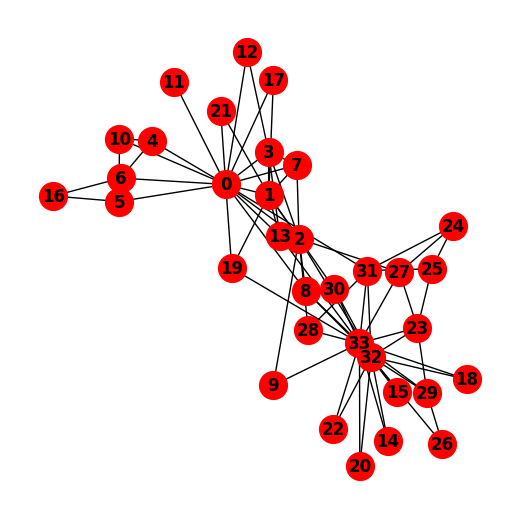

In [2]:
# リスト 8.1 頂点間の類似度(common neighbors、Jaccard coefficient、Adamic/Adar、preferential attachment)
import networkx as nx
import matplotlib.pyplot as plt

G = nx.karate_club_graph()
plt.figure(figsize=(5, 5))
nx.draw_spring(G, node_size=400, node_color="red", with_labels=True, font_weight='bold')
x = 4
y = 5
print("vertex pair:", x, "and", y)
print("neighbors of", x, ":", list(G.neighbors(x)))
print("neighbors of", y, ":", list(G.neighbors(y)))
print("degree of", x, ":", G.degree(x))
print("degree of", y, ":", G.degree(y))

print("common neighbors:", len(list(nx.common_neighbors(G, x, y))))
print("Jaccard coefficient:", list(nx.jaccard_coefficient(G, [(x, y)]))[0][2])
print("Adamic/Adar:", list(nx.adamic_adar_index(G, [(x, y)]))[0][2])
print("preferential attachment:", list(nx.preferential_attachment(G, [(x, y)]))[0][2])

common neighbors
[(2, 33, 6), (0, 33, 4), (7, 13, 4), (0, 32, 3), (1, 8, 3), (1, 33, 3), (2, 30, 3), (2, 31, 3), (4, 5, 3), (6, 10, 3)]
Jaccard coefficient
[(14, 15, 1.0), (14, 18, 1.0), (14, 20, 1.0), (14, 22, 1.0), (15, 18, 1.0), (15, 20, 1.0), (15, 22, 1.0), (17, 21, 1.0), (18, 20, 1.0), (18, 22, 1.0)]
Adamic/Adar
[(2, 33, 4.719381261461351), (0, 33, 2.7110197222973085), (1, 33, 2.252921681630931), (4, 5, 1.9922605072935597), (6, 10, 1.9922605072935597), (7, 13, 1.8081984819901584), (2, 31, 1.6733425912309228), (23, 31, 1.6656249548734432), (23, 24, 1.631586747071319), (0, 32, 1.613740043014111)]
preferential attachment
[(0, 33, 272), (0, 32, 192), (2, 33, 170), (1, 33, 153), (1, 32, 108), (3, 33, 102), (0, 23, 80), (3, 32, 72), (5, 33, 68), (6, 33, 68)]


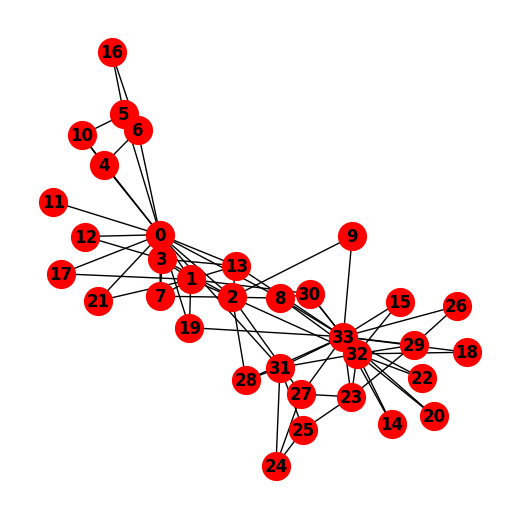

In [3]:
# リスト 8.2 頂点間の類似度によるリンク予測
import networkx as nx
import matplotlib.pyplot as plt

CN = []
JC = []
AA = []
PA = []
k = 10
G = nx.karate_club_graph()
plt.figure(figsize=(5, 5))
nx.draw_spring(G, node_size=400, node_color="red", with_labels=True, font_weight='bold')
n = nx.number_of_nodes(G)
for x in range(n):
  for y in range(x+1, n):
    if not(G.has_edge(x, y)):
      CN.append(tuple([x, y, len(list(nx.common_neighbors(G, x, y)))]))
      JC.append(list(nx.jaccard_coefficient(G, [(x, y)]))[0])
      AA.append(list(nx.adamic_adar_index(G, [(x, y)]))[0])
      PA.append(list(nx.preferential_attachment(G, [(x, y)]))[0])
print("common neighbors")
print(sorted(CN, key=lambda x:x[2], reverse=True)[:k])
print("Jaccard coefficient")
print(sorted(JC, key=lambda x:x[2], reverse=True)[:k])
print("Adamic/Adar")
print(sorted(AA, key=lambda x:x[2], reverse=True)[:k])
print("preferential attachment")
print(sorted(PA, key=lambda x:x[2], reverse=True)[:k])

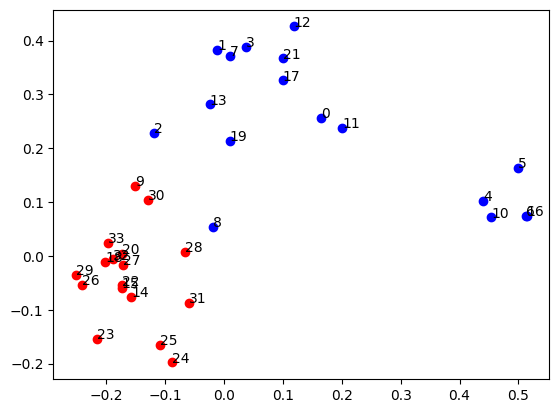

In [9]:
# リスト 8.3 Zachary's karate clubネットワークのnetwork embedding
import networkx as nx
import matplotlib.pyplot as plt
import random
from gensim.models import Word2Vec as word2vec

def make_random_walks(G, num_of_walk, length_of_walk):
  walks = list()
  for i in range(num_of_walk):
    node_list = list(G.nodes())
    for node in node_list:
      current_node = node
      walk = list()
      walk.append(str(node))
      for j in range(length_of_walk):
        next_node = random.choice(list(G.neighbors(current_node)))
        walk.append(str(next_node))
        current_node = next_node
      walks.append(walk)
  return walks

G = nx.karate_club_graph()
walks = make_random_walks(G, 100, 20)
#model = word2vec(walks, min_count=0, size=2, window=5, workers=1)
model = word2vec(walks, min_count=0, window=5, workers=1)

x = list()
y = list()
node_list = list()
colors = list()
fig, ax = plt.subplots()
for node in G.nodes():
  vector = model.wv[str(node)]
  x.append(vector[0])
  y.append(vector[1])
  ax.annotate(str(node), (vector[0], vector[1]))
  if G.nodes[node]["club"] == "Officer":
    colors.append("r")
  else:
    colors.append("b")
for i in range(len(x)):
  ax.scatter(x[i], y[i], c=colors[i])
plt.show()




In [11]:
# リスト 8.4 network embeddingによるリンク予測
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import random
from gensim.models import Word2Vec as word2vec

def make_random_walks(G, num_of_walk, length_of_walk):
  walks = list()
  for i in range(num_of_walk):
    node_list = list(G.nodes())
    for node in node_list:
      current_node = node
      walk = list()
      walk.append(str(node))
      for j in range(length_of_walk):
        next_node = random.choice(list(G.neighbors(current_node)))
        walk.append(str(next_node))
        current_node = next_node
      walks.append(walk)
  return walks

G = nx.karate_club_graph()
walks = make_random_walks(G, 100, 20)
#model = word2vec(walks, min_count=0, size=5, window=5, workers=1)
model = word2vec(walks, min_count=0, window=5, workers=1)

vlist = list()
for node in G.nodes():
  vector = model.wv[str(node)]
  print("%s:"%(str(node)), end="")
  print(vector)
  vlist.append(vector)

DW = []
k = 10
n = nx.number_of_nodes(G)
for x in range(n):
  for y in range(x+1, n):
    if not(G.has_edge(x, y)):
      DW.append(tuple([x, y, np.linalg.norm(vlist[x]-vlist[y])]))
print("link prediction based on network embedding")
print(sorted(DW, key=lambda x:x[2], reverse=False)[:k])

0:[-0.07488883  0.24332361  0.15175182 -0.07511902 -0.13693784 -0.30099598
 -0.00252849  0.4645676  -0.36698914 -0.383419   -0.2953834  -0.00911052
 -0.2365303   0.08601273 -0.11246725  0.24063224  0.03470858  0.16242409
  0.00838521 -0.5252545   0.03494018 -0.23567899  0.396211    0.14771357
 -0.19327396  0.14482994 -0.23365027 -0.18093407  0.05001254  0.51843935
  0.3128089  -0.05798575  0.06987953 -0.47802985  0.37542728  0.55288494
  0.1151461   0.05124515 -0.15655152 -0.10743869  0.33243957 -0.48909733
 -0.36701003  0.2480431   0.05472716 -0.28648114  0.05217995 -0.28697875
  0.08952062 -0.00923068  0.19499499 -0.22508481  0.01120145  0.19073145
 -0.0567097   0.19989033 -0.16509363 -0.24204515 -0.26760098  0.04019999
  0.04158678  0.01116844 -0.04532876  0.09907544  0.19878142  0.25023508
  0.21386603  0.02367339  0.1347802   0.02904717 -0.01669573 -0.02689239
 -0.00693853  0.48073453  0.21059905  0.22342323 -0.21449107  0.11173272
  0.36706257  0.10908151 -0.03909218  0.14603168 